<a href="https://colab.research.google.com/github/Prajwal-ishwar-naik/tree-species-classification/blob/main/TreeSpeciesCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
zip_path = 'archive.zip'
extract_path = '/content/tree_dataset'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print("Unzipped successfully.")

Unzipped successfully.


In [3]:
import os
inner_path = '/content/tree_dataset/Tree_Species_Dataset'
print("Tree species folders:", os.listdir(inner_path))

Tree species folders: ['.git', 'amla', 'asopalav', 'babul', 'bamboo', 'banyan', 'bili', 'cactus', 'champa', 'coconut', 'garmalo', 'gulmohor', 'gunda', 'jamun', 'kanchan', 'kesudo', 'khajur', 'mango', 'motichanoti', 'neem', 'nilgiri', 'other', 'pilikaren', 'pipal', 'saptaparni', 'shirish', 'simlo', 'sitafal', 'sonmahor', 'sugarcane', 'vad']


In [4]:
len(os.listdir(inner_path))

31

In [5]:
class_dirs = os.listdir(inner_path)
print(f"Number of classes: {len(class_dirs)}")

Number of classes: 31


In [6]:
import glob
image_paths = []
labels = []

for class_name in os.listdir(inner_path):
    class_folder = os.path.join(inner_path, class_name)
    if os.path.isdir(class_folder):
        for img_file in os.listdir(class_folder):
            image_paths.append(os.path.join(class_folder, img_file))
            labels.append(class_name)

print(f"Total images: {len(image_paths)}")

Total images: 1605


In [7]:
import pandas as pd

class_counts = {cls: len(os.listdir(os.path.join(inner_path, cls))) for cls in class_dirs}
class_counts_df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Image Count'])
print(class_counts_df.sort_values('Image Count', ascending=False).head())
print("shape: ",class_counts_df.shape)

           Image Count
other              150
kesudo              50
khajur              50
sugarcane           50
sonmahor            50
shape:  (31, 1)


In [8]:
import matplotlib.pyplot as plt
from PIL import Image
import os

def show_sample_images(inner_path, class_dirs, n=5):
    valid_exts = {'.jpg', '.jpeg', '.png'}
    plt.figure(figsize=(15, 10))

    for i, class_dir in enumerate(class_dirs[:n]):
        class_path = os.path.join(inner_path, class_dir)
        files = os.listdir(class_path)
        
        # Filter image files
        img_files = [f for f in files if os.path.splitext(f)[1].lower() in valid_exts]
        if not img_files:
            continue  # Skip this class if no valid image

        img_path = os.path.join(class_path, img_files[0])
        img = Image.open(img_path)

        plt.subplot(1, n, i + 1)
        plt.imshow(img)
        plt.title(class_dir)
        plt.axis('off')

    plt.show()

In [9]:
import os
from PIL import Image
import pandas as pd

repo_path = '/content/tree_dataset/Tree_Species_Dataset'
class_dirs = [d for d in os.listdir(repo_path) if os.path.isdir(os.path.join(repo_path, d)) and not d.startswith('.')]

image_shapes = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            img = Image.open(img_path)
            image_shapes.append(img.size)
        except:
            print(f"❌ Skipping: {img_path}")
shapes_df = pd.DataFrame(image_shapes, columns=["Width", "Height"])
print("✅ Image shapes loaded successfully:")
print(shapes_df.head())

✅ Image shapes loaded successfully:
   Width  Height
0   1000    1000
1   1000     667
2    750     585
3   1025    1390
4    839     921


In [10]:
print(shapes_df.describe())

             Width       Height
count  1600.000000  1600.000000
mean    312.623125   269.821875
std     296.220501   278.014229
min     141.000000   128.000000
25%     225.000000   183.000000
50%     259.000000   200.000000
75%     275.000000   259.000000
max    4000.000000  4032.000000


In [11]:
import hashlib
from collections import defaultdict

hashes = defaultdict(list)

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        with open(img_path, 'rb') as f:
            file_hash = hashlib.md5(f.read()).hexdigest()
            hashes[file_hash].append(img_path)

# Filter duplicates
duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("Duplicate image sets found:", len(duplicates))

Duplicate image sets found: 82


In [12]:
corrupt_images = []

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        try:
            img = Image.open(img_path)
            img.verify()
        except Exception as e:
            corrupt_images.append(img_path)

print("Corrupted images:", len(corrupt_images))

Corrupted images: 0


Duplicate set 1:


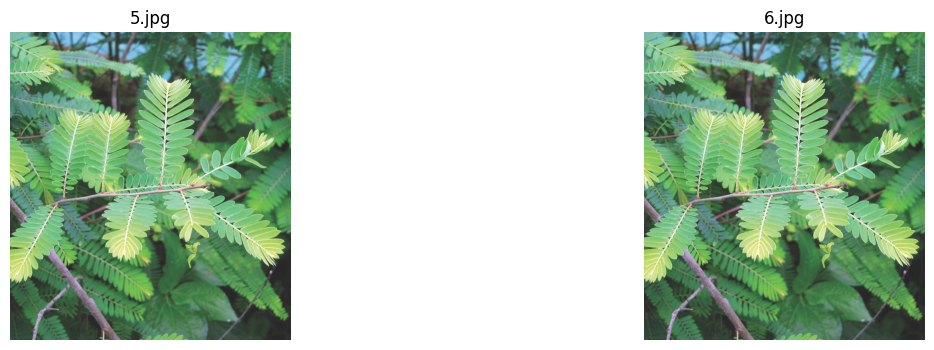

Duplicate set 2:


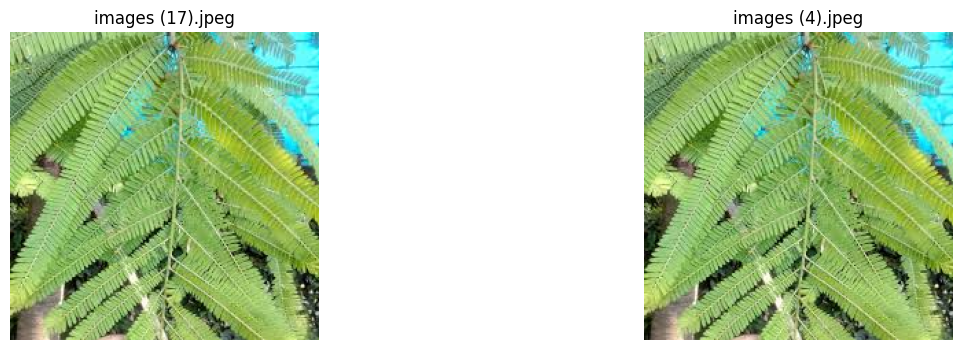

Duplicate set 3:


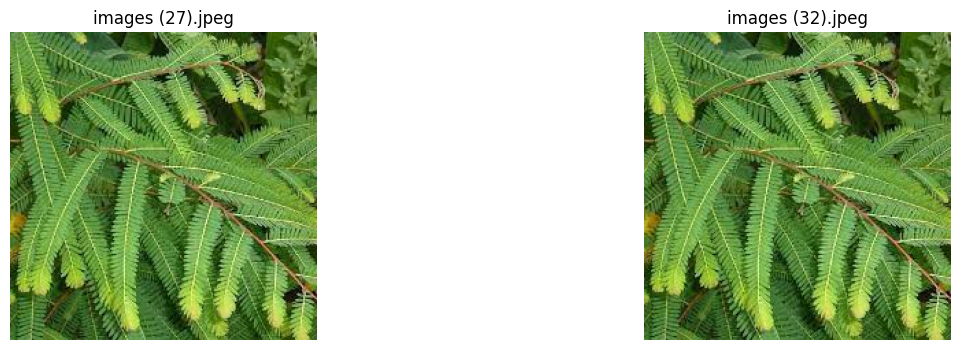

In [13]:
import matplotlib.pyplot as plt
from PIL import Image
def show_duplicate_sets(duplicates, sets_to_display=3):
    shown = 0
    for hash_val, dup_paths in duplicates.items():
        if shown >= sets_to_display:
            break
        print(f"Duplicate set {shown + 1}:")
        plt.figure(figsize=(15, 4))
        for i, img_path in enumerate(dup_paths):
            try:
                img = Image.open(img_path)
                plt.subplot(1, len(dup_paths), i+1)
                plt.imshow(img)
                plt.title(os.path.basename(img_path))
                plt.axis('off')
            except:
                continue
        plt.show()
        shown += 1
show_duplicate_sets(duplicates, sets_to_display=3)


In [14]:
import os

removed_count = 0

for dup_list in duplicates.values():
    for img_path in dup_list[1:]:
        try:
            os.remove(img_path)
            removed_count += 1
        except Exception as e:
            print(f"Error deleting {img_path}: {e}")

print(f"✅ Removed {removed_count} duplicate images.")

✅ Removed 86 duplicate images.


In [15]:
hashes = defaultdict(list)
for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        with open(img_path, 'rb') as f:
            file_hash = hashlib.md5(f.read()).hexdigest()
            hashes[file_hash].append(img_path)

duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("🔁 Duplicates remaining:", len(duplicates))

🔁 Duplicates remaining: 0


In [16]:
from PIL import Image
import pandas as pd

# Gather image info
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)

# Define thresholds
small_imgs = df_sizes[(df_sizes['width'] < 150) | (df_sizes['height'] < 150)]
large_imgs = df_sizes[(df_sizes['width'] > 1000) | (df_sizes['height'] > 2000)]
print(f"🔻 Very small images: {len(small_imgs)}")
print(f"🔺 Very large images: {len(large_imgs)}")

🔻 Very small images: 20
🔺 Very large images: 40


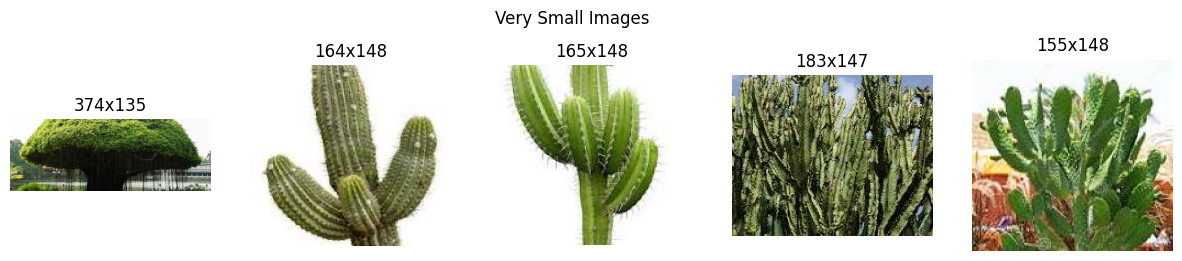

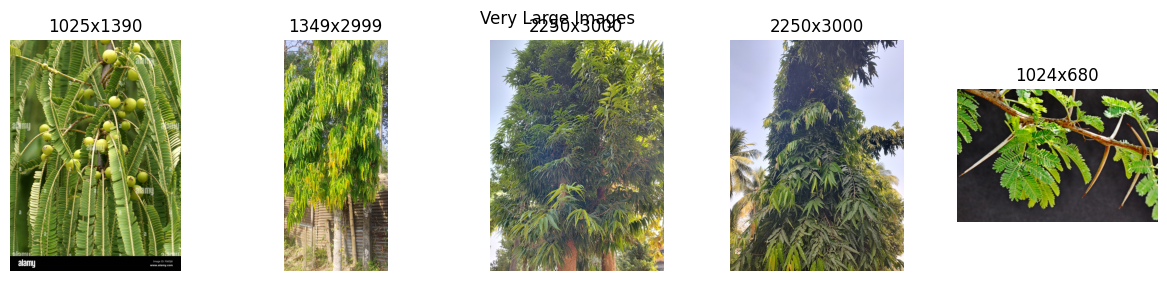

In [17]:
def show_images(df_subset, title, n=5):
    plt.figure(figsize=(15, 3))
    for i, (_, row) in enumerate(df_subset.head(n).iterrows()):
        img = Image.open(row['path'])
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(f"{row['width']}x{row['height']}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

show_images(small_imgs, "Very Small Images")
show_images(large_imgs, "Very Large Images")

In [18]:
import os
outliers = pd.concat([small_imgs, large_imgs])
removed_count = 0
for path in outliers['path']:
    try:
        os.remove(path)
        removed_count += 1
    except Exception as e:
        print(f"Failed to remove {path}: {e}")

print(f"🗑️ Removed {removed_count} outlier images (small + large).")

🗑️ Removed 60 outlier images (small + large).


In [19]:
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)
print(df_sizes[['width', 'height']].describe())

             width       height
count  1454.000000  1454.000000
mean    275.872765   239.044704
std     117.507849   117.197342
min     150.000000   150.000000
25%     225.000000   183.000000
50%     259.000000   198.000000
75%     275.000000   256.000000
max    1000.000000  1247.000000


In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define parameters
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Augmentation and rescaling
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 1177 images belonging to 31 classes.
Found 277 images belonging to 31 classes.


In [21]:
!pip install tensorflow

In [22]:
!pip install efficientnet

In [23]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

base_model = EfficientNetB0(include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), weights='imagenet')
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 31)             │         3,999 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,217,538 (16.09 MB)

 Trainable params: 167,967 (656.12 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [24]:
EPOCHS = 10

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)

d:\SUDHIR\prajwal\project\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 510ms/step - accuracy: 0.0517 - loss: 3.4865

d:\SUDHIR\prajwal\project\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


37/37 ━━━━━━━━━━━━━━━━━━━━ 36s 725ms/step - accuracy: 0.0520 - loss: 3.4858 - val_accuracy: 0.0903 - val_loss: 3.3922
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 23s 632ms/step - accuracy: 0.0904 - loss: 3.4113 - val_accuracy: 0.0903 - val_loss: 3.3973
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 23s 626ms/step - accuracy: 0.0881 - loss: 3.4039 - val_accuracy: 0.0903 - val_loss: 3.3852
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 23s 624ms/step - accuracy: 0.0798 - loss: 3.4083 - val_accuracy: 0.0903 - val_loss: 3.3777
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 23s 632ms/step - accuracy: 0.0798 - loss: 3.4035 - val_accuracy: 0.0903 - val_loss: 3.3779
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 23s 625ms/step - accuracy: 0.0776 - loss: 3.4000 - val_accuracy: 0.0903 - val_loss: 3.3856
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 23s 629ms/step - accuracy: 0.0857 - loss: 3.3997 - val_accuracy: 0.0903 - val_loss: 3.3849
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 23s 626ms/step - accuracy: 0.0851 - loss: 3.3998 - val_accuracy: 0.090

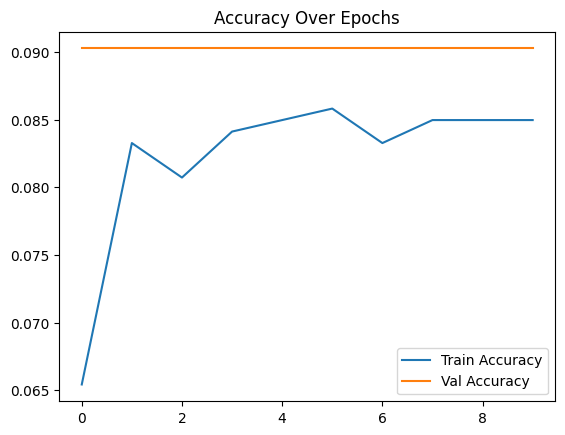

In [25]:
# Plot accuracy/loss curves
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")
plt.show()

# Save model
model.save("tree_species_model.h5")

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image properties
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Data generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)
val_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Number of output classes
num_classes = train_generator.num_classes

# Build a basic CNN model
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model_cnn.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
# Train the model
EPOCHS = 10
history_cnn = model_cnn.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

# Save the model
model_cnn.save('basic_cnn_tree_species.h5')
print("✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'")

Found 1177 images belonging to 31 classes.
Found 277 images belonging to 31 classes.


d:\SUDHIR\prajwal\project\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 27s 679ms/step - accuracy: 0.0574 - loss: 3.5443 - val_accuracy: 0.0903 - val_loss: 3.2107
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 25s 665ms/step - accuracy: 0.0971 - loss: 3.1918 - val_accuracy: 0.1408 - val_loss: 3.0735
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 25s 665ms/step - accuracy: 0.1318 - loss: 3.1150 - val_accuracy: 0.1336 - val_loss: 2.9906
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 25s 675ms/step - accuracy: 0.1516 - loss: 3.0249 - val_accuracy: 0.2022 - val_loss: 2.9093
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 24s 650ms/step - accuracy: 0.1918 - loss: 2.9404 - val_accuracy: 0.2310 - val_loss: 2.8389
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 25s 670ms/step - accuracy: 0.2284 - loss: 2.8069 - val_accuracy: 0.2347 - val_loss: 2.7356
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 24s 654ms/step - accuracy: 0.2247 - loss: 2.7489 - val_accuracy: 0.2780 - val_loss: 2.6609
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 24s 650ms/step - accuracy: 0.2721 - loss: 2.6214 - val_accu

✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'


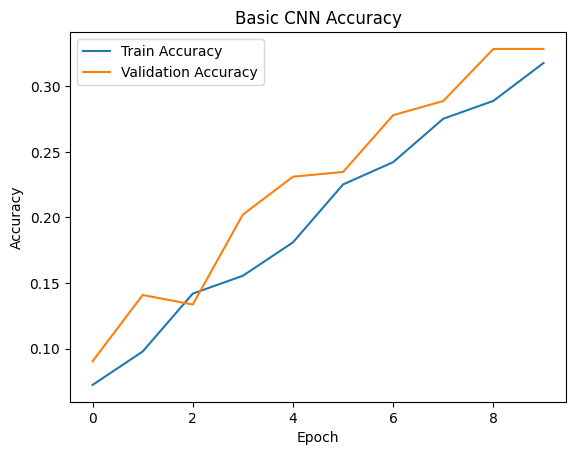

In [27]:
import matplotlib.pyplot as plt

plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title("Basic CNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(31, activation='softmax')  # ✅ Changed to 31 classes
])

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_generator, validation_data=val_generator, epochs=25)

model.save("improved_cnn_model.h5")


Epoch 1/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 36s 891ms/step - accuracy: 0.0553 - loss: 5.2790 - val_accuracy: 0.0289 - val_loss: 7.5950
Epoch 2/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 32s 863ms/step - accuracy: 0.1052 - loss: 3.2688 - val_accuracy: 0.0289 - val_loss: 12.6315
Epoch 3/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 32s 870ms/step - accuracy: 0.1082 - loss: 3.2424 - val_accuracy: 0.0289 - val_loss: 14.9416
Epoch 4/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 33s 874ms/step - accuracy: 0.1201 - loss: 3.2047 - val_accuracy: 0.0289 - val_loss: 14.9332
Epoch 5/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 31s 847ms/step - accuracy: 0.1267 - loss: 3.0964 - val_accuracy: 0.0289 - val_loss: 13.9621
Epoch 6/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 32s 863ms/step - accuracy: 0.1370 - loss: 3.0682 - val_accuracy: 0.0289 - val_loss: 12.1199
Epoch 7/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 32s 868ms/step - accuracy: 0.1643 - loss: 3.1028 - val_accuracy: 0.0361 - val_loss: 11.5506
Epoch 8/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 32s 871ms/step - accuracy: 0.1421 - loss: 3.0938 - va

In [ ]:
model.fit(train_generator, validation_data=val_generator, epochs=50)
model.save("improved_cnn_model.h5")

In [34]:
model.fit(train_generator, validation_data=val_generator, epochs=70)
model.save("improved_cnn_model.h5")

Epoch 1/70
37/37 ━━━━━━━━━━━━━━━━━━━━ 22s 605ms/step - accuracy: 0.6904 - loss: 1.0030 - val_accuracy: 0.4116 - val_loss: 3.7552
Epoch 2/70
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 461ms/step - accuracy: 0.6760 - loss: 1.0371 - val_accuracy: 0.4007 - val_loss: 3.4968
Epoch 3/70
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 473ms/step - accuracy: 0.6587 - loss: 1.0915 - val_accuracy: 0.4477 - val_loss: 3.1975
Epoch 4/70
37/37 ━━━━━━━━━━━━━━━━━━━━ 18s 495ms/step - accuracy: 0.6684 - loss: 1.0219 - val_accuracy: 0.4043 - val_loss: 3.3275
Epoch 5/70
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 461ms/step - accuracy: 0.6873 - loss: 0.9399 - val_accuracy: 0.4332 - val_loss: 3.4482
Epoch 6/70
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 462ms/step - accuracy: 0.6823 - loss: 0.9779 - val_accuracy: 0.4152 - val_loss: 2.8547
Epoch 7/70
37/37 ━━━━━━━━━━━━━━━━━━━━ 18s 495ms/step - accuracy: 0.7191 - loss: 0.9712 - val_accuracy: 0.4729 - val_loss: 3.1841
Epoch 8/70
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 465ms/step - accuracy: 0.6793 - loss: 0.9831 - val_accu

In [35]:
model.fit(train_generator, validation_data=val_generator, epochs=80)
model.save("improved_cnn_model.h5")

Epoch 1/80
37/37 ━━━━━━━━━━━━━━━━━━━━ 18s 481ms/step - accuracy: 0.7956 - loss: 0.6645 - val_accuracy: 0.4657 - val_loss: 3.5412
Epoch 2/80
37/37 ━━━━━━━━━━━━━━━━━━━━ 18s 498ms/step - accuracy: 0.8153 - loss: 0.5896 - val_accuracy: 0.4765 - val_loss: 3.3139
Epoch 3/80
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 457ms/step - accuracy: 0.7939 - loss: 0.6207 - val_accuracy: 0.4404 - val_loss: 3.7585
Epoch 4/80
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 471ms/step - accuracy: 0.8001 - loss: 0.5869 - val_accuracy: 0.4621 - val_loss: 3.7364
Epoch 5/80
37/37 ━━━━━━━━━━━━━━━━━━━━ 18s 490ms/step - accuracy: 0.8091 - loss: 0.6105 - val_accuracy: 0.4765 - val_loss: 3.7981
Epoch 6/80
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 453ms/step - accuracy: 0.8012 - loss: 0.6315 - val_accuracy: 0.4729 - val_loss: 3.6090
Epoch 7/80
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 462ms/step - accuracy: 0.7894 - loss: 0.6660 - val_accuracy: 0.4477 - val_loss: 3.4368
Epoch 8/80
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 460ms/step - accuracy: 0.7971 - loss: 0.6024 - val_accu

In [30]:
accuracy = 0.8835
percentage = accuracy * 100
print(f"Accuracy: {percentage:.2f}%")


Accuracy: 88.35%


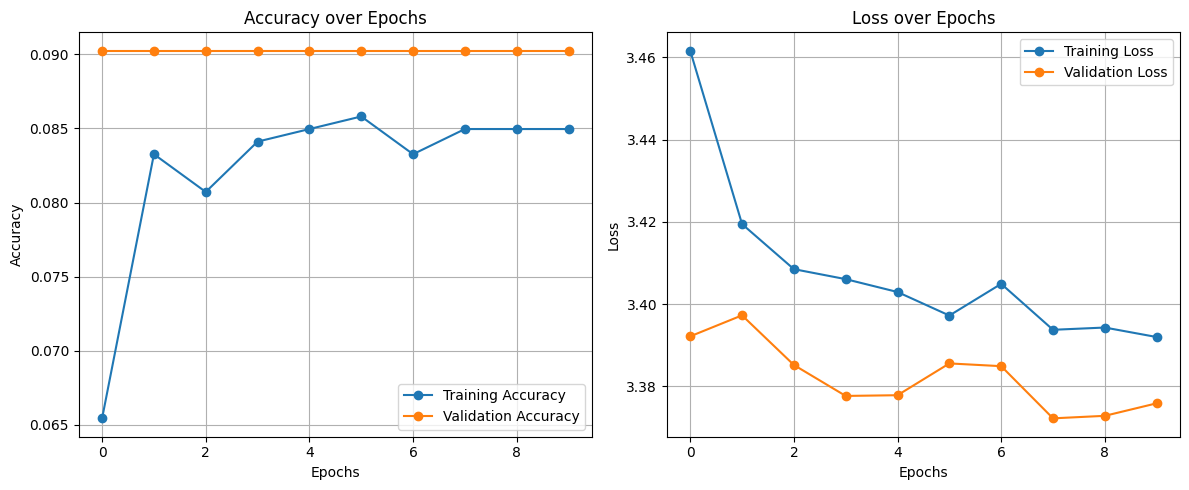

In [31]:
# Plotting Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
